<a href="https://colab.research.google.com/github/paulc00/ML-Intro/blob/master/notebooks/6_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction

Dimensionality reduction is the process of reducing the number of features in your dataset. It can be divided into feature selection and feature extraction (feature engineering). The *dimensions* in dimensionality reduction refers to the dataset features.

As you add more dimensions you need many, many more examples (records/instances/samples) in order to have each combination of features represented. This is what is known as **the curse of dimensionality**.

Kevin Lacker gave an excellent example demonstrating the curse of dimensionality on [Quora](https://www.quora.com/What-is-the-curse-of-dimensionality):

> Let's say you have a straight line 100 yards long and you dropped a penny somewhere on it. It wouldn't be too hard to find. You walk along the line and it takes two minutes.
>
> Now, let's say you have a square 100 yards on each side and you dropped a penny somewhere on it. It would be pretty hard, like searching across two football fields stuck together. It could take days.
>
> Now, a cube 100 yards across. That's like searching a 30-story building the size of a football stadium.





In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import normalize

In [0]:
iris = datasets.load_iris()
iris_df =  pd.DataFrame(iris.data, columns=iris.feature_names)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
# X = iris.data
X = iris_df
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

## Feature Selection

Feature selection eliminates irrelevant, or less relevant, features from the dataset.

### Variance Thresholds

Variance thresholds drop any features that do not have much variance across examples. You should *normalize* your data before performing variance thresholding. Normalizing the data will scale it down so it has 

In [0]:
np.var(X_normalized[:, 0])
np.linalg.norm(X_normalized[:, 0], 2)

9.218658410528967

In [0]:
# We don't really have to normalize here because all of our features are in cm
# But it's good practice because you'll often have a mix of units where you
# absolutely must normalize before applying a variance threshold
X_normalized = normalize(X, norm='l2')

sel = VarianceThreshold(threshold=0.01)
X_hivar = sel.fit_transform(X_normalized)
print("Features:")
print(f"  Before: {iris_df.columns.tolist()}")
print(f"  After: {iris_df.columns[sel.get_support()].tolist()}")
print(f"\nValues (first 5 examples):\n{X_hivar[:5]}")

Features:
  Before: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
  After: ['sepal width (cm)', 'petal length (cm)']

Values (first 5 examples):
[[0.55160877 0.22064351]
 [0.50702013 0.23660939]
 [0.54831188 0.2227517 ]
 [0.53915082 0.26087943]
 [0.5694948  0.2214702 ]]


## Feature Extraction

Feature extraction, or feature engineering, creates new features from combinations of existing features.



### Principal Component Analysis (PCA)

PCA projects your data into a lower dimension while trying to retain as much variance (information) as possible in the process.

The first principal component is the projection with the maximum information. The second principal component is 

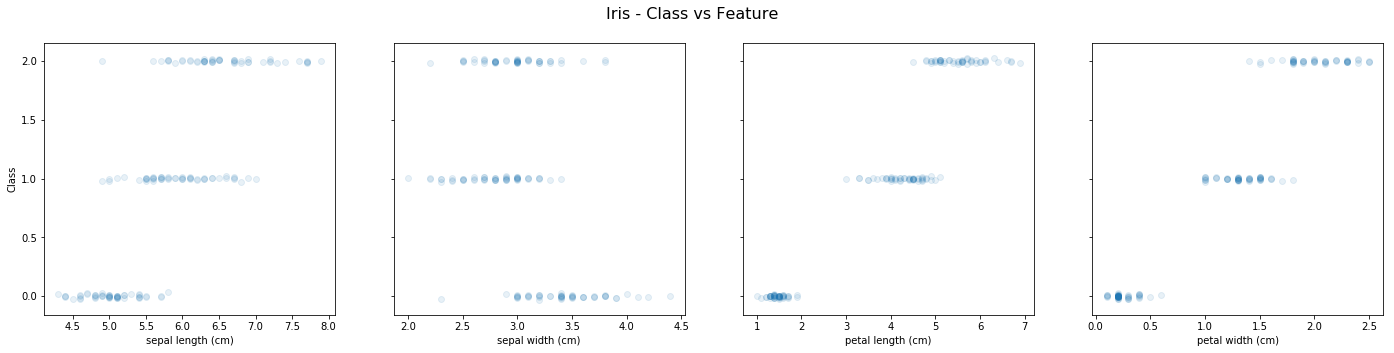

In [0]:
def rand_jitter(arr):
    stdev = .005*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

fig, ax = plt.subplots(1, 4, sharey='row', figsize=(24, 5))
fig.suptitle('Iris - Class vs Feature', fontsize=16)
ax[0].set_ylabel('Species')
for i in range(4):
  # plt.subplot(1, 4, i + 1)
  ax[i].scatter(X.iloc[:, i], rand_jitter(y), alpha=0.1)      
  ax[i].set_xlabel(feature_names[i])
# fig.tight_layout()

In [0]:

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))


explained variance ratio (first two components): [0.92461872 0.05306648]


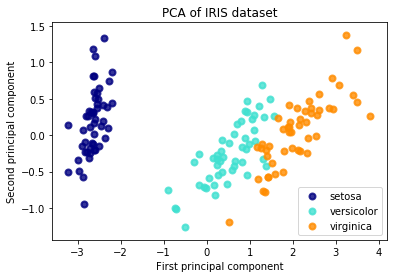

In [0]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

plt.show()